Testing OpenMM AWSEM implementation using newly created Github repository version

In [1]:
!pwd

/Users/weilu/openmmawsem/examples


In [2]:
%run ../openmmawsem.py

In [3]:
class ForceReporter(object):
    def __init__(self, file, reportInterval):
        self._out = open(file, 'w')
        self._reportInterval = reportInterval

    def __del__(self):
        self._out.close()

    def describeNextReport(self, simulation):
        steps = self._reportInterval - simulation.currentStep%self._reportInterval
        return (steps, False, False, True, False)

    def report(self, simulation, state):
        forces = state.getForces().value_in_unit(kilojoules/mole/nanometer)
        self._out.write(str(state.getTime())+"\n")
        #self._out.write(str(dir(state)))
        for f in forces:
            self._out.write('%g %g %g\n' % (f[0], f[1], f[2]))

In [22]:
# build OpenMMAWSEM simulation object
# check each energy term individually

def openawsemsystem(pdb='pdb_samples/n-ALAv2.pdb',chain='A',term=-1):
    resnames=prepare_pdb(pdb,chain)
    output_pdb_filename = pdb.split('.')[0] + '-openmmawsem.pdb'
    oa = OpenMMAWSEMSystem(output_pdb_filename,resnames, xml_filename="../awsem.xml")

    # setup Hamiltonian
    if term==1:
        print('apply_con_term')
        term_name='Con'
        apply_con_term(oa)
    elif term==2:
        print('apply_chain_term')
        term_name='Chain'
        apply_chain_term(oa)
    elif term==3:
        print('apply_chi_term')
        term_name='Chi'
        apply_chi_term(oa)
    elif term==4:
        print('apply_excl_term')
        term_name='Excluded'
        apply_excl_term(oa)
    elif term==5:
        print('apply_rama_term')
        term_name='Rama'
        apply_rama_term(oa)
    elif term==6:
        print('apply_direct_term')
        term_name='Direct'
        apply_direct_term(oa)
    elif term==7:
        print('apply_mediated_term')
        term_name='Mediated'
        apply_mediated_term(oa)
    elif term==8:
        print('apply_contact_term')
        term_name='Contact'
        apply_contact_term(oa)
    elif term==9:
        print('apply_beta_term')
        term_name='Beta'
        apply_beta_term(oa)
    elif term==10:
        print('apply_pap_term')
        term_name='P_AP'
        apply_pap_term(oa)
    elif term==11:
        print('apply_dsb_term')
        term_name='DSB'
        apply_dsb_term(oa)
    elif term==12:
        print('apply_helix_term')
        term_name='HELIX'
        apply_helix_term(oa)
    elif term==13:
        print('apply_associative_memory_term')
        term_name='Frag_Mem'
        apply_associative_memory_term(oa)
    return term_name,oa
import time

OA_energy={}

for i in range(2,4):
    if i==12:
        continue
        #pass
    term_name,oa=openawsemsystem(term=i)
    # setup simulation parameters
    reporter_frequency = 1000
    num_steps = 1000
    step_size = 2e-10*femtoseconds
    temperature = 100*kelvin
    #platform = Platform.getPlatformByName('Reference') # OpenCL, CUDA, CPU, or Reference

    # start simulation
    #integrator = VerletIntegrator(step_size)
    integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
    #simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
    simulation = Simulation(oa.pdb.topology, oa.system, integrator)
    simulation.context.setPositions(oa.pdb.positions)
    #simulation.context.setVelocitiesToTemperature(temperature, 1)
    #simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
    simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
    #simulation.reporters.append(ForceReporter('forces.txt', 100))
    simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
            potentialEnergy=True, temperature=True))
    tt=time.time()
    simulation.step(1)
    state = simulation.context.getState(getEnergy=True)
    print((time.time()-tt)*1000,'ms')
    print(term_name, state.getPotentialEnergy())
    OA_energy[term_name]=state.getPotentialEnergy()._value
    #print (i,time.time()-tt)

/Users/weilu/anaconda3/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:536: UserWarning: WARNING: duplicate atom (ATOM     11  HN  ALA A   1      -0.508   0.077  -0.877  1.00  0.00           H  , ATOM      5  HN  ALA A   1      -0.495   0.091   0.883  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  % message, PDBConstructionWarning)
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some a

apply_chain_term
5.000114440917969 ms
Chain 366.968994140625 kJ/mol


/Users/weilu/anaconda3/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:536: UserWarning: WARNING: duplicate atom (ATOM     11  HN  ALA A   1      -0.508   0.077  -0.877  1.00  0.00           H  , ATOM      5  HN  ALA A   1      -0.495   0.091   0.883  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  % message, PDBConstructionWarning)
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some a

apply_chi_term
5.790233612060547 ms
Chi 0.7006528973579407 kJ/mol


In [6]:
#Comparison of chain energy obtained with original AWSEM, with the one with open AWSEM
(84.279587*4.184)/366.9655364593491 #84.27 Original, 4.184 Kcal to KJ, 366.95 openawsem

0.9609234573096278

In [23]:
0.7006528973579407/4.184

0.16746006151002404

In [7]:
#Ori=np.array([0.026909,0.406787,0.970964])
#Open=np.array([0.00010385283729874573,0.002036441534983169,0.005168611294720904])

In [8]:
#Ori/Open/100

In [9]:
lines=["Step   	Chain   	Shake   	Chi     	Rama    	Excluded	DSSP    	P_AP    	Water   	Burial  	Helix   	AMH-Go  	Frag_Mem	Vec_FM  	Membrane	SSB     	Electro.	VTotal",
"0 	4.359499	0.000000	0.342007	-0.498416	0.000000	0.000000	0.000000	0.000000	-4.207226	0.000000	0.000000	-28.768079	0.000000	0.000000	0.000000	0.000000	-28.772215"]
for line in lines[1:]:
    Original_energy={a.strip():float(b) for a,b in zip(lines[0].split('\t'),line.split('\t'))}

In [10]:
Original_energy

{'AMH-Go': 0.0,
 'Burial': -4.207226,
 'Chain': 4.359499,
 'Chi': 0.342007,
 'DSSP': 0.0,
 'Electro.': 0.0,
 'Excluded': 0.0,
 'Frag_Mem': -28.768079,
 'Helix': 0.0,
 'Membrane': 0.0,
 'P_AP': 0.0,
 'Rama': -0.498416,
 'SSB': 0.0,
 'Shake': 0.0,
 'Step': 0.0,
 'VTotal': -28.772215,
 'Vec_FM': 0.0,
 'Water': 0.0}

In [11]:
import pandas
Energy_Comparison=pandas.concat([pandas.Series(OA_energy),
                                 pandas.Series(Original_energy)*4.184], 
                                axis=1,keys=['OA','AWSEM'])
Energy_Comparison=Energy_Comparison.dropna()
Energy_Comparison=Energy_Comparison.stack().reset_index()
Energy_Comparison.columns=['Term','FF','Energy']
Energy_Comparison

,Term,FF,Energy
0,Chain,OA,366.968994
1,Chain,AWSEM,18.240144


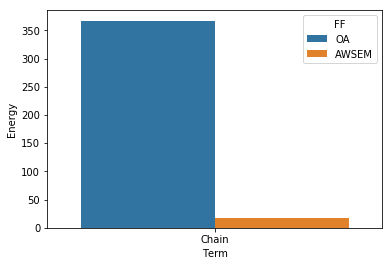

In [12]:
import seaborn as sns
%matplotlib inline
sns.barplot(x='Term',y='Energy',hue='FF',data=Energy_Comparison.dropna(),)

In [13]:
#Original AWSEM energy
lines=["${Step} ${E_chain} ${E_bond} ${E_chi} ${E_rama} ${E_excl} ${E_dssp} ${E_pap} ${E_water} ${E_helix} ${E_fmem} ${E_P}",
"0 125.14097265090966005 2576.6193841718609292 43.11773912006802334 -669.30477221848389036 139.62710896190355925 -14.657452540386717743 -9.370328729848813154 -296.90172405512521436 -53.589501506675645714 -932.83474949303399626 907.84667636118797418",
"0 125.14097265090966005 2576.6193841718609292 43.11773912006802334 -669.30477221848389036 139.62710896190355925 -14.657452540386717743 -9.370328729848813154 -296.90172405512521436 -53.589501506675645714 -932.83474949303399626 907.84667636118797418",
"0 125.14097265090966005 2576.6193841718609292 43.11773912006802334 -669.30477221848389036 139.62710896190355925 -14.657452540386717743 -9.370328729848813154 -296.90172405512521436 -53.589501506675645714 -932.83474949303399626 907.84667636118797418",
"0 125.14097265090966005 2576.6193841718609292 43.11773912006802334 -669.30477221848389036 139.62710896190355925 -14.657452540386717743 -9.370328729848813154 -296.90172405512521436 -53.589501506675645714 -932.83474949303399626 907.84667636118797418",
"0 125.14097265090966005 2576.6193841718609292 43.11773912006802334 -669.30477221848389036 139.62710896190355925 -14.657452540386717743 -9.370328729848813154 -296.90172405512521436 -53.589501506675645714 -932.83474949303399626 907.84667636118797418"] 
for line in lines[1:]:
    Original_energy={a:float(b) for a,b in zip(lines[0].split(),line.split())}

In [17]:
resnames=prepare_pdb('pdb_samples/n-ALAv2.pdb','A')
oa = OpenMMAWSEMSystem('pdb_samples/n-ALAv2-openmmawsem.pdb',resnames, xml_filename="../awsem.xml")

/Users/weilu/anaconda3/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:536: UserWarning: WARNING: duplicate atom (ATOM     11  HN  ALA A   1      -0.508   0.077  -0.877  1.00  0.00           H  , ATOM      5  HN  ALA A   1      -0.495   0.091   0.883  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  % message, PDBConstructionWarning)
/Users/weilu/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:289: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue ALA het=  resseq=1 icode= > at line 14.
Exception ignored.
Some a

In [18]:
print(Original_energy['${E_rama}']/12.40440099184707)
print(Original_energy['${E_chi}']/0.21218129433691502)

-53.957040945257404
203.21178289921693


In [19]:
fixer = PDBFixer(filename='pdb_samples/n-ALAv2.pdb')

/Users/weilu/anaconda3/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:536: UserWarning: WARNING: duplicate atom (ATOM     11  HN  ALA A   1      -0.508   0.077  -0.877  1.00  0.00           H  , ATOM      5  HN  ALA A   1      -0.495   0.091   0.883  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))


In [20]:
p=oa.system.getVirtualSite(66)

In [21]:
#Chain
ca_im = np.array([27.280,0.002,20.276]) #CA10
ca_i  = np.array([30.943,0.000,21.436]) #CA11
ca_ip = np.array([33.178,0.002,24.563]) #CA12
cb_i  = np.array([31.498,1.207,20.689]) #CB11
o_im  = np.array([29.492,-0.001,19.247]) #O10
o_i   = np.array([30.648,0.004,23.858])  #O11

n_i   = 0.48318 *ca_im + 0.70328 *ca_i - 0.18643 *o_im
cp_i = 0.44365 *ca_i + 0.23520 *ca_ip + 0.32115 *o_i
h_i   = 0.84100 *ca_im + 0.89296 *ca_i - 0.73389 *o_im
np.set_printoptions(suppress=True)
print(n_i.round(3),cp_i.round(3),h_i.round(3))
from scipy.spatial import distance as sdist
print(sdist.euclidean(n_i,cb_i),sdist.euclidean(cp_i,cb_i),sdist.euclidean(n_i,cp_i))

[ 29.445   0.001  21.284] [ 31.374   0.002  22.949] [ 28.929   0.002  22.068]
2.4545970985006895 2.564555486626491 2.548508839171672


In [10]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout
import os
#pdb = PDBFile('/home/cab22/davinci/scratch/Dynamicsv4/1l63_Original_All_MD_001/Structure.pdb')
for i in range(1,14):
    oa=openawsemsystem(pdb='/home/cab22/davinci/scratch/Dynamicsv4/1l63_Original_All_MD_001/Structure.pdb',chain='A',t=i)
    # setup simulation parameters
    reporter_frequency = 1000
    num_steps = 1000
    step_size = 2*femtoseconds
    temperature = 100*kelvin
    #platform = Platform.getPlatformByName('Reference') # OpenCL, CUDA, CPU, or Reference

    # start simulation
    #integrator = VerletIntegrator(step_size)
    integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
    #simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
    simulation = Simulation(oa.pdb.topology, oa.system, integrator)
    simulation.context.setPositions(oa.pdb.positions)
    simulation.context.setVelocitiesToTemperature(temperature, 1)
    simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
    simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
    #simulation.reporters.append(ForceReporter('forces.txt', 100))
    simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
            potentialEnergy=True, temperature=True))
    tt=time.time()
    state = simulation.context.getState(getEnergy=True)
    print(i,time.time()-tt, state.getPotentialEnergy())
    #simulation.step(num_steps)
    #print ()

#os.path.join('structures', file)
#simulation.context.setPositions(pdb.positions)
#state = simulation.context.getState(getEnergy=True)
#print(file, state.getPotentialEnergy())

ZeroDivisionError: float division by zero

In [175]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB import PDBIO


p = PDBParser()
structure=p.get_structure('X','n-ALAv2-openmmawsem.pdb')
for model in structure:
    for chain in model:
        r_im={}
        r_i={}
        for residue in chain:
            r_im=r_i
            r_i={}
            for atom in residue:
                r_i[atom.get_name()]=atom
            if 'N' in r_i:
                r_i['N'].set_coord( 0.48318*r_im['CA'].get_coord()+ 0.70328*r_i['CA'].get_coord()- 0.18643 *r_im['O'].get_coord())
            if 'C' in r_im:
                r_im['C'].set_coord(0.44365*r_im['CA'].get_coord()+ 0.23520*r_i['CA'].get_coord()+ 0.32115 *r_im['O'].get_coord())
            if 'H' in r_i:
                r_i['H'].set_coord( 0.84100*r_im['CA'].get_coord()+ 0.89296*r_i['CA'].get_coord()- 0.73389 *r_im['O'].get_coord())
io = PDBIO()
io.set_structure(structure)
io.save('n-ALAv2-openmmawsem.pdb')
        

In [63]:
# # prepare pdb
# prepare_pdb('1r69.pdb', ['A'])

# build OpenMMAWSEM simulation object
oa = OpenMMAWSEMSystem('1r69-openmmawsem.pdb')

# setup hamiltonian
apply_con_term(oa)
apply_chain_term(oa)
apply_chi_term(oa)
apply_excl_term(oa)
apply_rama_term(oa)
apply_contact_term(oa)

# setup simulation parameters
reporter_frequency = 1000
num_steps = 100000
step_size = 2*femtoseconds
temperature = 100*kelvin
#platform = Platform.getPlatformByName('Reference') # OpenCL, CUDA, CPU, or Reference

# start simulation
integrator = VerletIntegrator(step_size)
#integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
#simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
simulation = Simulation(oa.pdb.topology, oa.system, integrator)
simulation.context.setPositions(oa.pdb.positions)
simulation.context.setVelocitiesToTemperature(temperature, 1)
simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(num_steps)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,45.44520997945054,98.48043264234444
2000,43.25902950456716,99.42327482902984
3000,60.64954762723584,92.38890160149656
4000,71.04649949384444,87.87267782357067
5000,73.51314544188291,86.78654316661022
6000,63.940958077122154,91.55475453241148
7000,68.18276021564601,89.71917457439581
8000,64.99740223781758,91.03638166832644
9000,68.63018054582882,89.0797443701043
10000,66.7081574557269,89.9204899632133
11000,66.43440643658425,90.54841293458144
12000,56.81852337962921,94.61070475461929
13000,74.37973063354193,87.32569476718385
14000,83.97162833865353,83.09503037835296
15000,58.1634146317665,94.62102136265922
16000,58.84944487323446,94.26685492980312
17000,50.47381651998148,97.83488606673085
18000,72.3135816332906,88.35020540351348
19000,79.3307520855188,85.2547496625521
20000,70.41090469750387,89.21870725300316
21000,5444.765969169361,2496.0197693628697
22000,4072.5757181118056,3096.525313708415
23000,4552.049012845149,2886.28847

In [71]:
from openmmawsem import *

In [22]:
pdb_id = '1R69'
chain_id = 'A'

# pdb_id = pdb_id.lower()
# pdbl = PDBList()
# pdbl.retrieve_pdb_file(pdb_id, pdir='.')

# os.rename("pdb%s.ent" % pdb_id, "%s.pdb" % pdb_id)

# # prepare pdb
res_names = prepare_pdb("%s.pdb" % pdb_id, [chain_id])

# build OpenMMAWSEM simulation object
oa = OpenMMAWSEMSystem("%s-openmmawsem.pdb" % pdb_id, res_names)

# setup hamiltonian
apply_con_term(oa)
apply_chain_term(oa)
apply_chi_term(oa)
apply_excl_term(oa)
apply_rama_term(oa)
apply_contact_term(oa)
apply_beta_term(oa)
apply_pap_term(oa)
apply_helix_term(oa)

# setup simulation parameters
reporter_frequency = 1000
num_steps = 100000
step_size = 2*femtoseconds
temperature = 10*kelvin
platform = Platform.getPlatformByName('CPU') # OpenCL, CUDA, CPU, or Reference

# start simulation
#integrator = VerletIntegrator(step_size)
integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
#simulation = Simulation(oa.pdb.topology, oa.system, integrator)
simulation.context.setPositions(oa.pdb.positions)
simulation.context.setVelocitiesToTemperature(temperature, 1)
#simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(num_steps)

2
[3, 9, 15, 21, 27, 33, 38]
[3, 15, 21, 27, 33, 38]
[3, 21, 27, 33, 38]
[3, 27, 33, 38]


Exception: Particle coordinate is nan

In [15]:
%debug

> c:\users\dell\onedrive\research\repositories\openmmawsem\openmmawsem\openmmawsem.py(807)apply_helix_term()
    805                 del other_cb_with_gly_ca[i-1]
    806                 del other_cb_with_gly_ca[i-1]
--> 807                 if res_names[i+4] == "PRO":
    808                         continue
    809                 fai = helix_frequencies[res_names[i]]

ipdb> i
2
ipdb> exit


In [27]:
from openmmawsem import *

In [36]:
#for i in range(oa.system.getNumParticles()):
#    print (oa.system.isVirtualSite(i), oa.system.getParticleMass(i))

In [29]:
pdb_id = '1R69'
chain_id = 'A'

# pdb_id = pdb_id.lower()
# pdbl = PDBList()
# pdbl.retrieve_pdb_file(pdb_id, pdir='.')

# os.rename("pdb%s.ent" % pdb_id, "%s.pdb" % pdb_id)

# # prepare pdb
res_names = prepare_pdb("%s.pdb" % pdb_id, [chain_id])

# build OpenMMAWSEM simulation object
oa = OpenMMAWSEMSystem("%s-openmmawsem.pdb" % pdb_id, res_names)

# setup hamiltonian
apply_con_term(oa)
apply_chain_term(oa)
#apply_chi_term(oa)
#apply_excl_term(oa)
#apply_rama_term(oa)
#apply_contact_term(oa)
#apply_beta_term(oa)
#apply_pap_term(oa)
#apply_dsb_term(oa)
apply_helix_term(oa)

# setup simulation parameters
reporter_frequency = 1
num_steps = 1
step_size = 2*femtoseconds
temperature = 10*kelvin
platform = Platform.getPlatformByName('CPU') # OpenCL, CUDA, CPU, or Reference

# start simulation
#integrator = VerletIntegrator(step_size)
integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
#simulation = Simulation(oa.pdb.topology, oa.system, integrator)
simulation.context.setPositions(oa.pdb.positions)
simulation.context.setVelocitiesToTemperature(temperature, 1)
#simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(num_steps)

Exception: Particle coordinate is nan

In [3]:
from openmmawsem import *

In [2]:
pdb_id = '1R69'
chain_id = 'A'

# pdb_id = pdb_id.lower()
# pdbl = PDBList()
# pdbl.retrieve_pdb_file(pdb_id, pdir='.')
# os.rename("pdb%s.ent" % pdb_id, "%s.pdb" % pdb_id)

# # prepare pdb
res_names = prepare_pdb("%s.pdb" % pdb_id, [chain_id])

# build OpenMMAWSEM simulation object
oa = OpenMMAWSEMSystem("%s-openmmawsem.pdb" % pdb_id, res_names)

# setup hamiltonian
apply_con_term(oa)
apply_chain_term(oa)
apply_chi_term(oa)
apply_excl_term(oa)
apply_rama_term(oa)
#apply_contact_term(oa)
#apply_beta_term(oa)
#apply_pap_term(oa)
#apply_dsb_term(oa)
#apply_helix_term(oa)
apply_associative_memory_term(oa)

# setup simulation parameters
reporter_frequency = 1000
num_steps = 100000
step_size = 2*femtoseconds
temperature = 50*kelvin
platform = Platform.getPlatformByName('OpenCL') # OpenCL, CUDA, CPU, or Reference

# start simulation
#integrator = VerletIntegrator(step_size)
integrator = LangevinIntegrator(temperature, 1/picosecond, step_size)
simulation = Simulation(oa.pdb.topology, oa.system, integrator, platform)
#simulation = Simulation(oa.pdb.topology, oa.system, integrator)
simulation.context.setPositions(oa.pdb.positions)
simulation.context.setVelocitiesToTemperature(temperature, 1)
simulation.minimizeEnergy(tolerance=Quantity(value=.0001, unit=kilojoule/mole))
simulation.reporters.append(PDBReporter('output.pdb', reporter_frequency))
simulation.reporters.append(StateDataReporter(stdout, reporter_frequency, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(num_steps)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,-4238.491079688072,44.08258503062771
2000,-4219.962238818407,47.502738678365155
3000,-4216.182186037302,52.065080977822
4000,-4215.22731038928,49.37914019576216
5000,-4225.358080804348,48.80358105752544
6000,-4228.538562387228,51.93735718506211
7000,-4223.73433727026,44.19495335471884
8000,-4207.357366472483,52.465863653692324
9000,-4227.241860866547,47.95444917595709
10000,-4210.652197688818,49.66502457757011
11000,-4218.463583409786,52.438772610789584
12000,-4216.093226343393,47.21614784707364
13000,-4229.783365815878,48.031207781430425
14000,-4210.9359820485115,49.255546756128474
15000,-4214.126323312521,48.4558478365759
16000,-4224.059704184532,50.341343229202046
17000,-4212.285930633545,46.81151247333156
18000,-4218.703988671303,48.875670732261206
19000,-4216.946358323097,49.34610895106211
20000,-4215.972053706646,48.663342880154964
21000,-4215.1729456186295,46.556496920398025
22000,-4213.550024867058,47.50746329409901
23